# Classification Project - Online News Popularity

Checking the popularity of different online news posts.

Data Set Information:

* The articles were published by Mashable (www.mashable.com) and their content as the rights to reproduce it belongs to them. Hence, this dataset does not share the original content but some statistics associated with it. The original content be publicly accessed and retrieved using the provided urls. 
* Acquisition date: January 8, 2015 
* The estimated relative performance values were estimated by the authors using a Random Forest classifier and a rolling windows as assessment method. See their article for more details on how the relative performance values were set.

We have assumed that the most popular posts are shared the most and calculated the average number of posts as 3501.
We have also divided the data into 2 classes 
- class-4(popular posts, if the average number of posts>3501) and 
- class-2 (not-so-popular posts, if the average number of posts<=3501)
We intend to anticipate the popularity(class) of the post and it is our target variable.


### [1] Data Source - UCI
Data source link - https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity#

### [2] Data Description

Attribute Information:

Number of Attributes: 61 (58 predictive attributes, 2 non-predictive, 1 goal field) 

Attribute Information: 
0. url: URL of the article (non-predictive) 
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive) 
2. n_tokens_title: Number of words in the title 
3. n_tokens_content: Number of words in the content 
4. n_unique_tokens: Rate of unique words in the content 
5. n_non_stop_words: Rate of non-stop words in the content 
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content 
7. num_hrefs: Number of links 
8. num_self_hrefs: Number of links to other articles published by Mashable 
9. num_imgs: Number of images 
10. num_videos: Number of videos 
11. average_token_length: Average length of the words in the content 
12. num_keywords: Number of keywords in the metadata 
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'? 
14. data_channel_is_entertainment: Is data channel 'Entertainment'? 
15. data_channel_is_bus: Is data channel 'Business'? 
16. data_channel_is_socmed: Is data channel 'Social Media'? 
17. data_channel_is_tech: Is data channel 'Tech'? 
18. data_channel_is_world: Is data channel 'World'? 
19. kw_min_min: Worst keyword (min. shares) 
20. kw_max_min: Worst keyword (max. shares) 
21. kw_avg_min: Worst keyword (avg. shares) 
22. kw_min_max: Best keyword (min. shares) 
23. kw_max_max: Best keyword (max. shares) 
24. kw_avg_max: Best keyword (avg. shares) 
25. kw_min_avg: Avg. keyword (min. shares) 
26. kw_max_avg: Avg. keyword (max. shares) 
27. kw_avg_avg: Avg. keyword (avg. shares) 
28. self_reference_min_shares: Min. shares of referenced articles in Mashable 
29. self_reference_max_shares: Max. shares of referenced articles in Mashable 
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable 
31. weekday_is_monday: Was the article published on a Monday? 
32. weekday_is_tuesday: Was the article published on a Tuesday? 
33. weekday_is_wednesday: Was the article published on a Wednesday? 
34. weekday_is_thursday: Was the article published on a Thursday? 
35. weekday_is_friday: Was the article published on a Friday? 
36. weekday_is_saturday: Was the article published on a Saturday? 
37. weekday_is_sunday: Was the article published on a Sunday? 
38. is_weekend: Was the article published on the weekend? 
39. LDA_00: Closeness to LDA topic 0 
40. LDA_01: Closeness to LDA topic 1 
41. LDA_02: Closeness to LDA topic 2 
42. LDA_03: Closeness to LDA topic 3 
43. LDA_04: Closeness to LDA topic 4 
44. global_subjectivity: Text subjectivity 
45. global_sentiment_polarity: Text sentiment polarity 
46. global_rate_positive_words: Rate of positive words in the content 
47. global_rate_negative_words: Rate of negative words in the content 
48. rate_positive_words: Rate of positive words among non-neutral tokens 
49. rate_negative_words: Rate of negative words among non-neutral tokens 
50. avg_positive_polarity: Avg. polarity of positive words 
51. min_positive_polarity: Min. polarity of positive words 
52. max_positive_polarity: Max. polarity of positive words 
53. avg_negative_polarity: Avg. polarity of negative words 
54. min_negative_polarity: Min. polarity of negative words 
55. max_negative_polarity: Max. polarity of negative words 
56. title_subjectivity: Title subjectivity 
57. title_sentiment_polarity: Title polarity 
58. abs_title_subjectivity: Absolute subjectivity level 
59. abs_title_sentiment_polarity: Absolute polarity level 
60. shares: Number of shares (target)

# [3] Importing Libraries

In [375]:
%matplotlib inline
import numpy as np
import matplotlib as mlt
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix,recall_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

# [4] Importing Dataset

In [376]:
data = pd.read_csv("OnlineNewsPopularity_missing.csv")

In [377]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 62 columns):
url                              2648 non-null object
timedelta                        2648 non-null int64
n_tokens_title                   2648 non-null int64
n_tokens_content                 2648 non-null int64
n_unique_tokens                  2648 non-null float64
n_non_stop_words                 2648 non-null float64
n_non_stop_unique_tokens         2648 non-null float64
num_hrefs                        2648 non-null int64
num_self_hrefs                   2648 non-null int64
num_imgs                         2648 non-null int64
num_videos                       2648 non-null int64
average_token_length             2648 non-null float64
num_keywords                     2648 non-null int64
data_channel_is_lifestyle        2648 non-null int64
data_channel_is_entertainment    2648 non-null int64
data_channel_is_bus              2648 non-null int64
data_channel_is_socmed           264

In [378]:
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popular
0,http://mashable.com/2014/06/06/apple-home-auto...,216,8,1084,0.454630,1.0,0.642527,29,1,1,...,1.0,-0.142560,-0.3125,-0.050,0.000,0.00,0.500,0.00,3400,4
1,http://mashable.com/2014/06/06/apple-iwatch-oc...,216,11,969,0.448384,1.0,0.599018,9,1,18,...,1.0,-0.322665,-0.9000,-0.050,0.400,-0.40,0.100,0.40,6300,4
2,http://mashable.com/2014/06/06/apple-spotsetter/,216,13,139,0.671533,1.0,0.717172,2,2,6,...,0.7,-0.050000,-0.0500,-0.050,0.200,0.40,0.300,0.40,3500,4
3,http://mashable.com/2014/06/06/california-chro...,216,12,333,0.519355,1.0,0.630542,1,1,1,...,0.5,-0.294444,-0.8000,-0.125,0.825,0.25,0.325,0.25,1200,2
4,http://mashable.com/2014/06/06/canon-irista-fl...,216,13,283,0.595506,1.0,0.729412,8,4,1,...,0.5,-0.211111,-0.3750,-0.125,0.000,0.00,0.500,0.00,1800,2


# [5] Cleaning out irrelevant columns
We don't need the first two columns in the dataset

In [379]:
data.drop(["url", "timedelta"], axis = 1, inplace = True) 

# [6] Handling Missing Data

In [380]:
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

kw_avg_min                       50
LDA_00                          100
max_negative_polarity           150
abs_title_subjectivity          150
abs_title_sentiment_polarity    100
dtype: int64

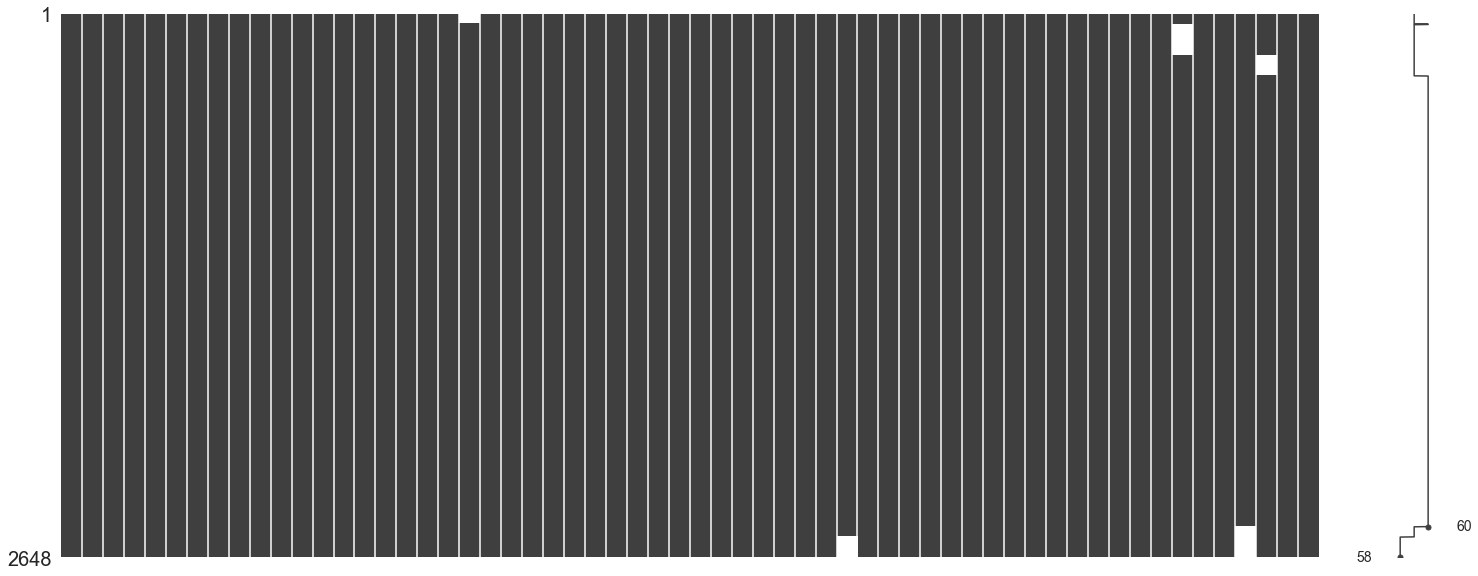

In [381]:
import missingno as msno
msno.matrix(data)

# [7] Imputing Missing values

Deleting the rows where the rows have missing values

In [382]:
data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

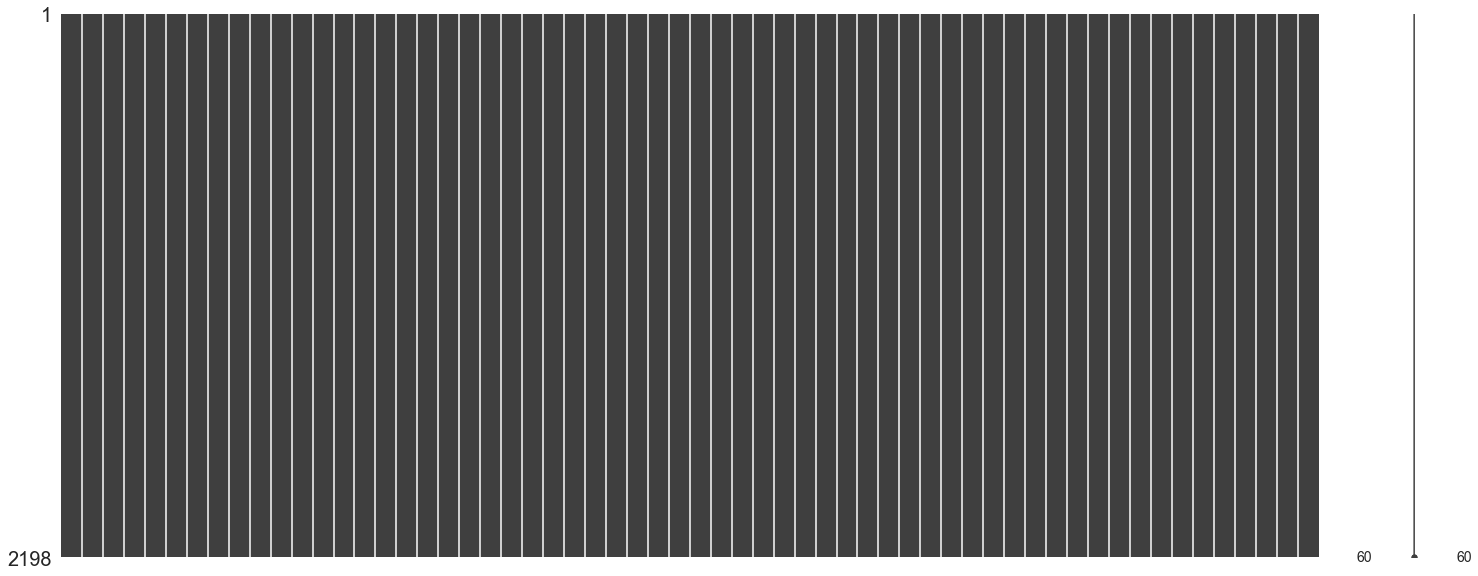

In [383]:
msno.matrix(data)

# [8] Data Visualization and Analysis

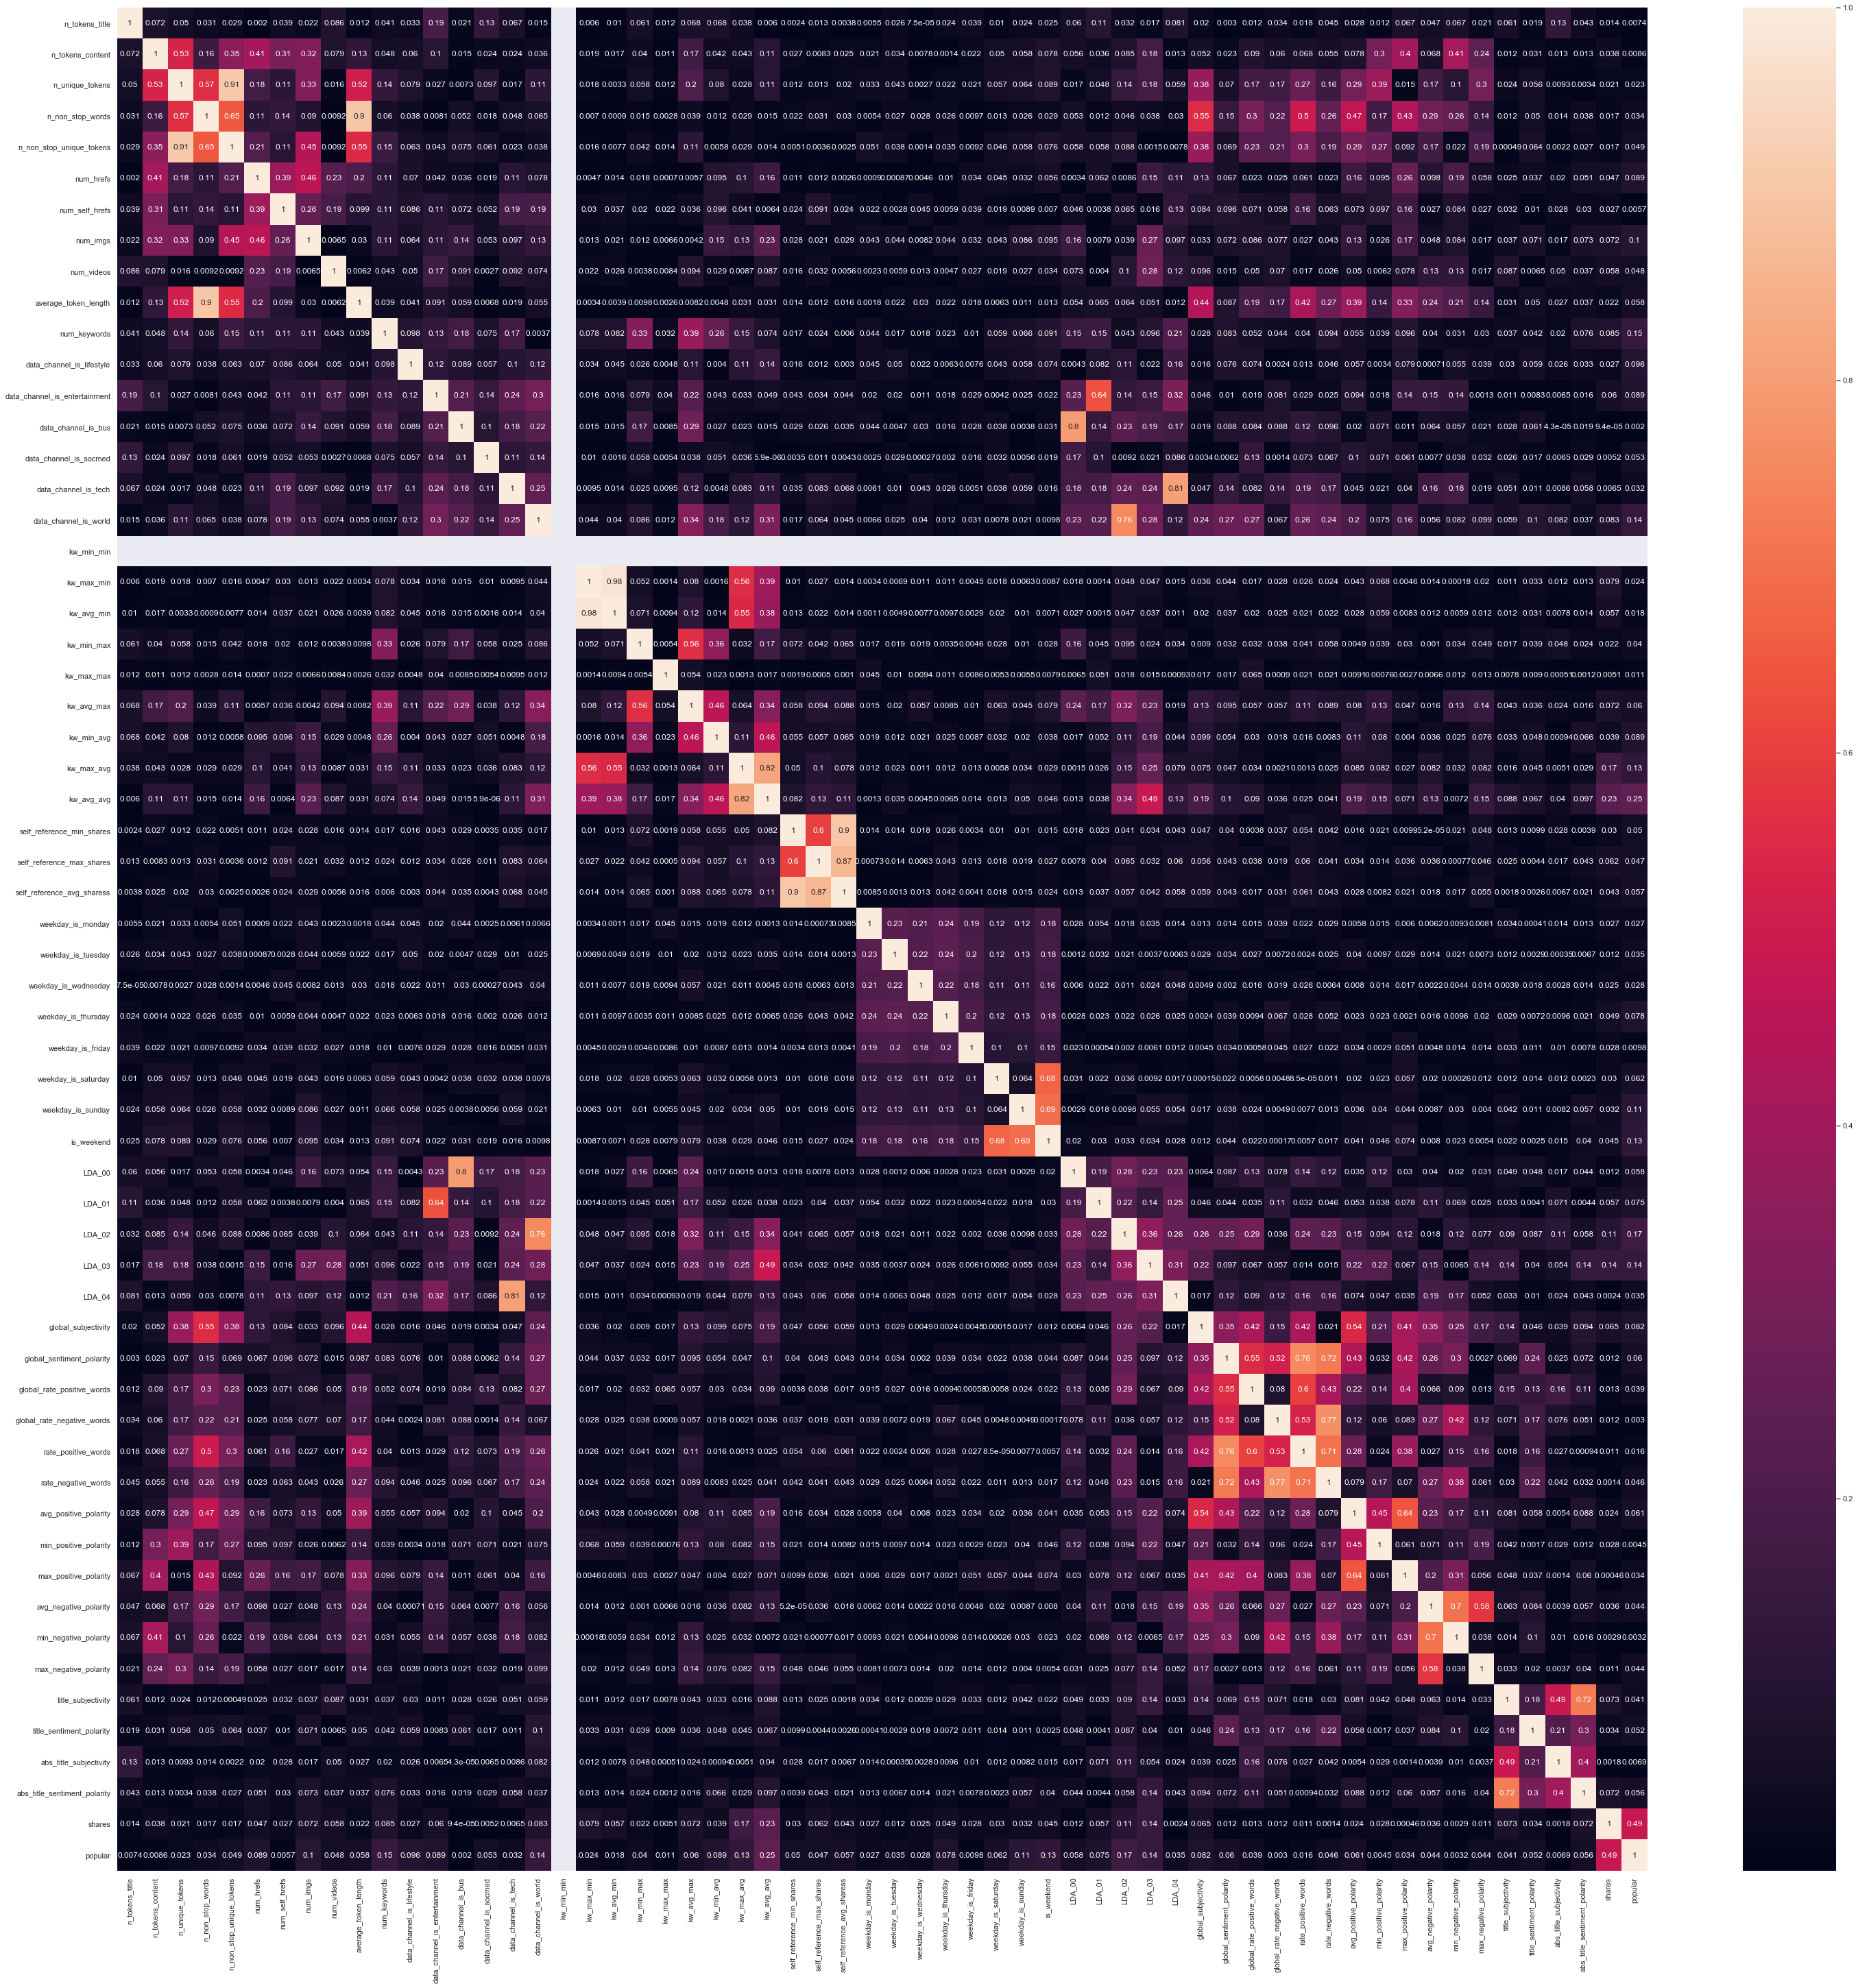

In [384]:
# Correlation of all the variables with respect to each other

sns.set(rc={'figure.figsize':(50,50)})
sns.heatmap(data.corr().abs(),annot=True)

In [385]:
# To get the highest correlated attributes

def get_redundant_pairs(data):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = data.columns
    for i in range(0, data.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(data, n=5):
    au_corr = data.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(data)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(data, 20))

Top Absolute Correlations
kw_max_min                     kw_avg_min                      0.977600
n_unique_tokens                n_non_stop_unique_tokens        0.912704
self_reference_min_shares      self_reference_avg_sharess      0.902527
n_non_stop_words               average_token_length            0.901286
self_reference_max_shares      self_reference_avg_sharess      0.866640
kw_max_avg                     kw_avg_avg                      0.821504
data_channel_is_tech           LDA_04                          0.806237
data_channel_is_bus            LDA_00                          0.798485
global_rate_negative_words     rate_negative_words             0.766778
data_channel_is_world          LDA_02                          0.757686
global_sentiment_polarity      rate_positive_words             0.755969
title_subjectivity             abs_title_sentiment_polarity    0.724495
global_sentiment_polarity      rate_negative_words             0.722290
rate_positive_words            rate_ne

This means that we can use just one of the highly correlated attributes instead of one so that we don't have replicated attributes.

# [9] Dropping the highly correlated attributes and keeping only one of them.

Deleting columns having correlation more than 75.


In [386]:
data1 = data.drop(['n_non_stop_unique_tokens', 'n_non_stop_words', 
                'kw_max_min', 'self_reference_max_shares','kw_max_avg', 'rate_negative_words','kw_min_min','kw_max_max','self_reference_min_shares', 'rate_positive_words', 'rate_negative_words'], axis=1)

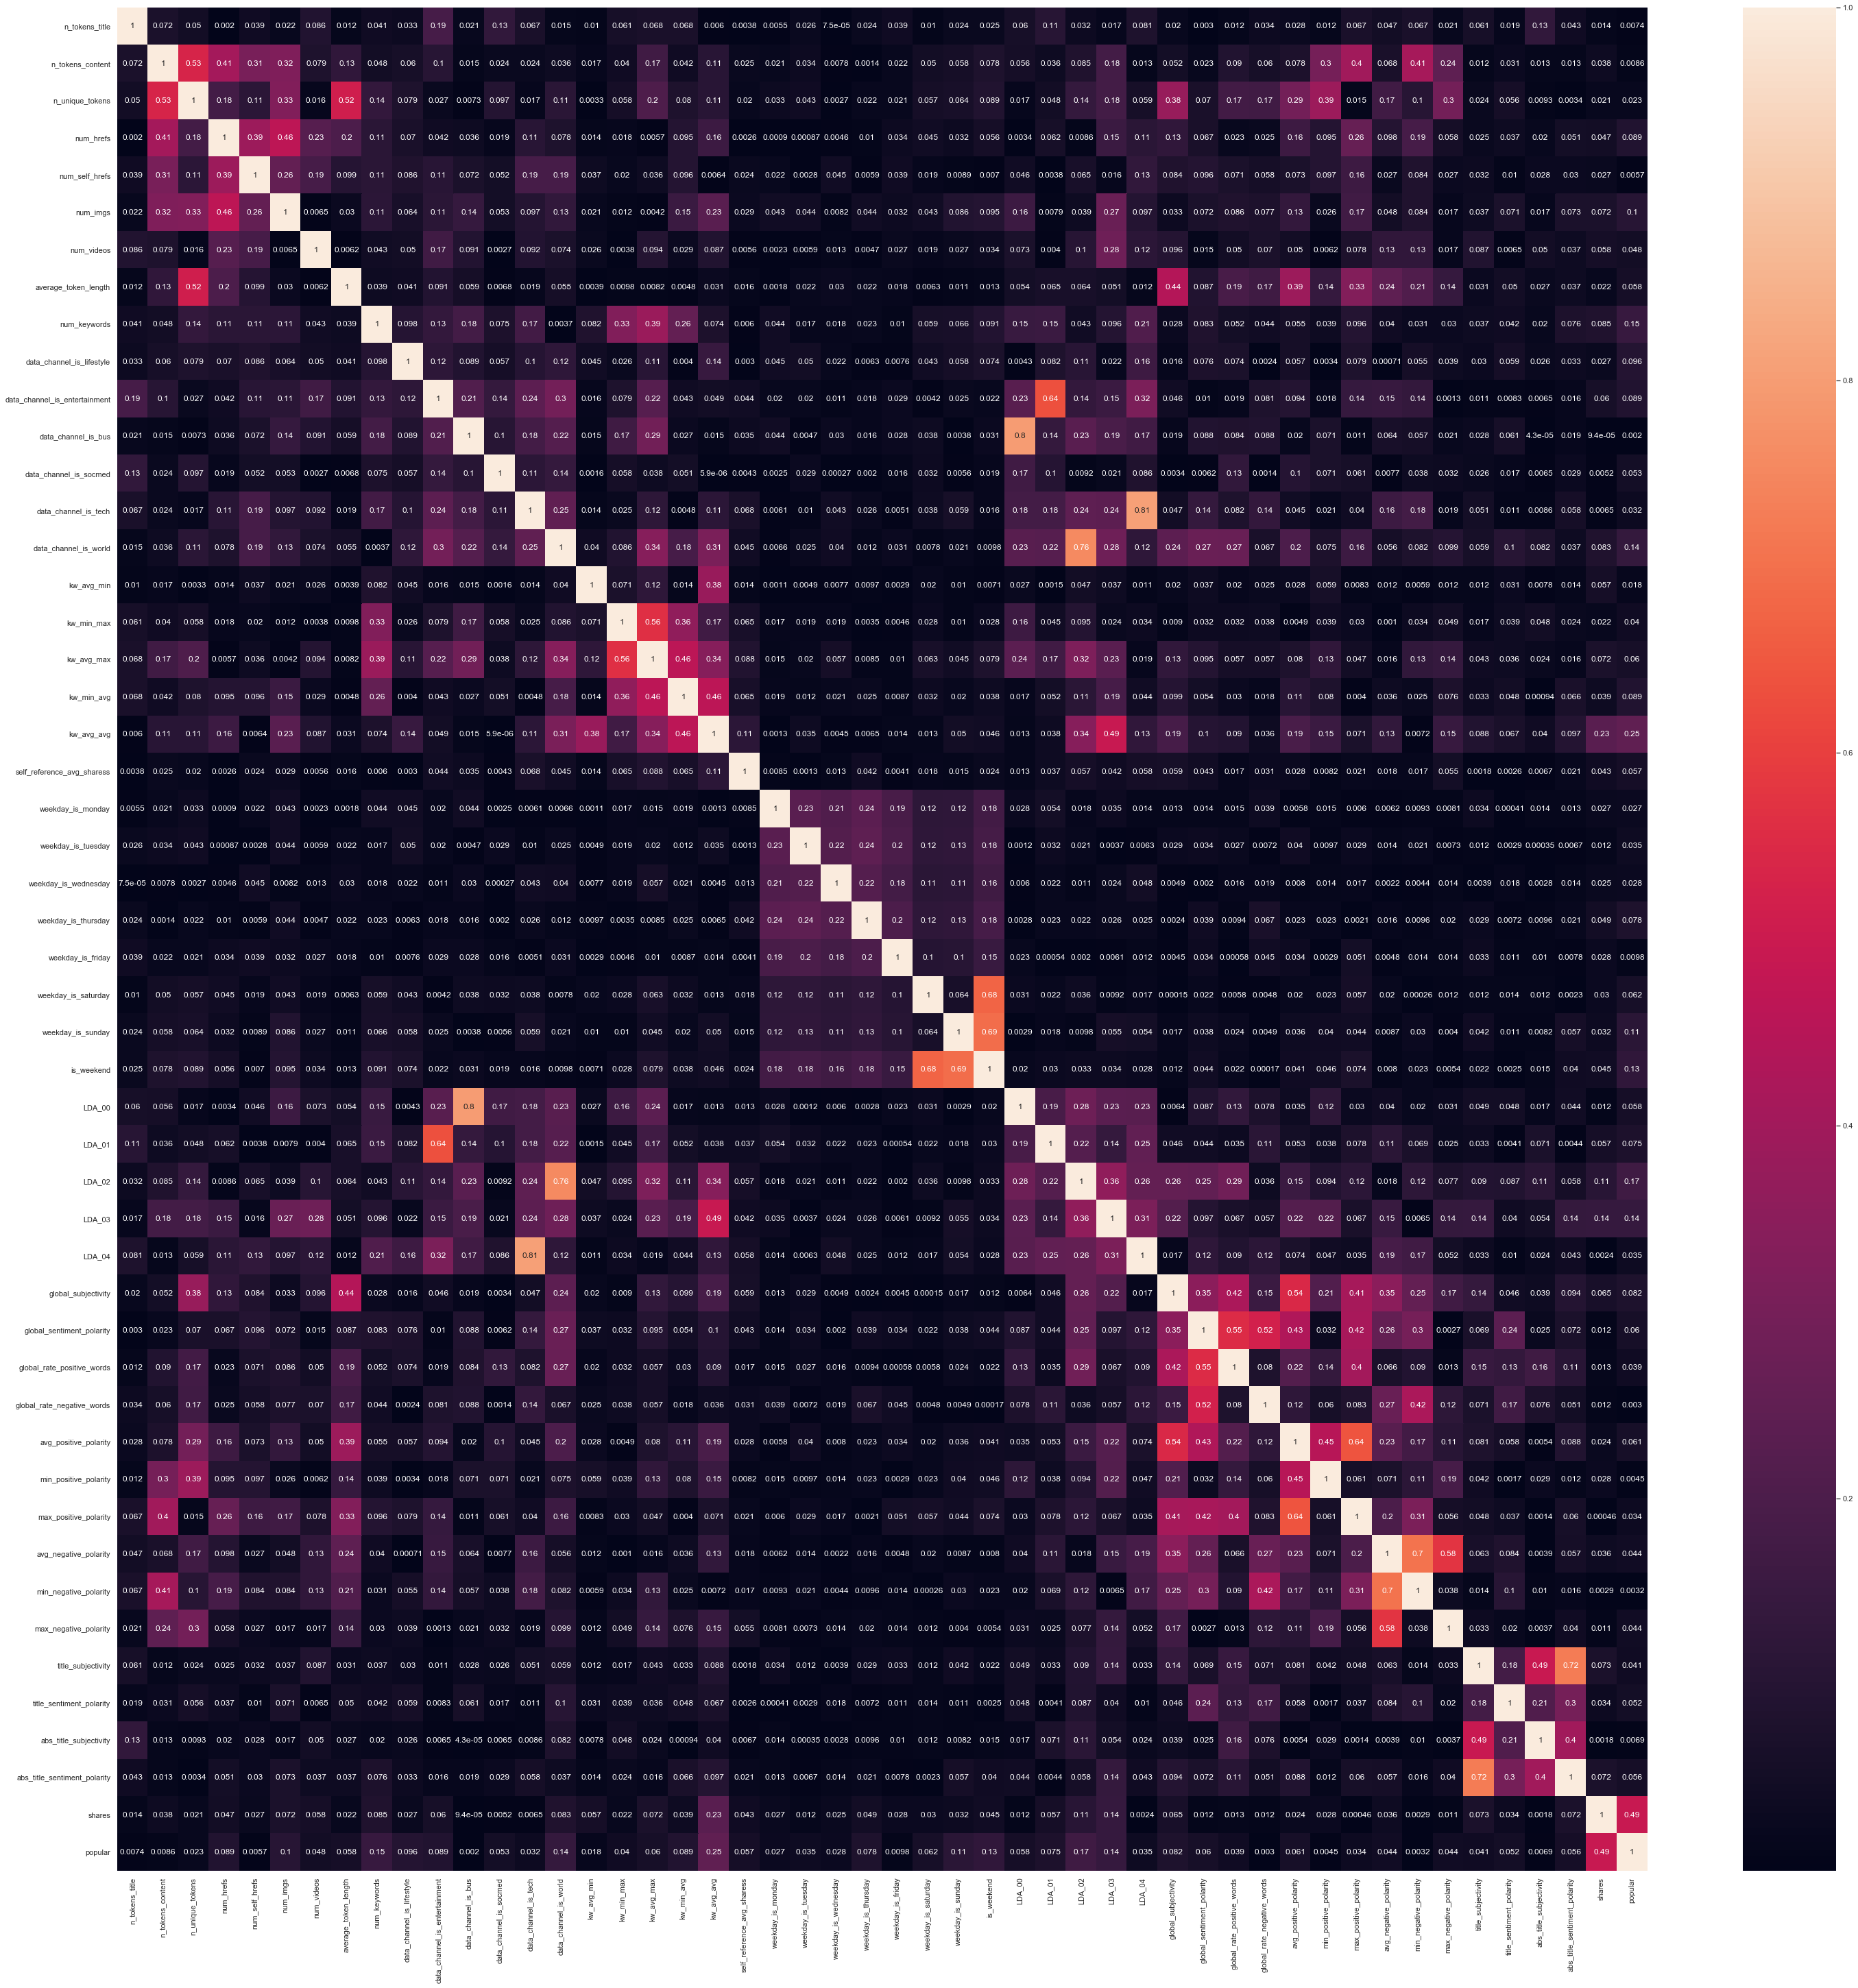

In [387]:
# Correlation of all the variables with respect to each other

sns.set(rc={'figure.figsize':(50,50)})
sns.heatmap(data1.corr().abs(),annot=True)

In [388]:
data1.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popular
count,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,...,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000
mean,10.757962,601.189263,0.522813,11.433121,3.002730,5.436306,1.189263,4.615886,7.123749,0.047771,...,0.770169,-0.271194,-0.562727,-0.106466,0.285673,0.054020,0.337903,0.154493,2999.870792,2.401274
std,2.200595,485.192359,0.119267,13.273525,2.851824,7.929439,3.039212,0.661020,1.933621,0.213329,...,0.233458,0.120232,0.283593,0.094781,0.323987,0.265708,0.191557,0.222804,6694.029179,0.801136
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,35.000000,2.000000
25%,9.000000,279.250000,0.462993,4.000000,1.000000,1.000000,0.000000,4.488781,6.000000,0.000000,...,0.600000,-0.337500,-0.800000,-0.125000,0.000000,0.000000,0.150000,0.000000,977.000000,2.000000
50%,11.000000,461.000000,0.526803,8.000000,2.000000,2.000000,0.000000,4.676074,7.000000,0.000000,...,0.800000,-0.265040,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000,2.000000
75%,12.000000,785.750000,0.589089,14.000000,4.000000,7.000000,1.000000,4.863096,9.000000,0.000000,...,1.000000,-0.200000,-0.400000,-0.050000,0.500000,0.136364,0.500000,0.250000,2500.000000,2.000000
max,18.000000,5553.000000,0.971429,145.000000,40.000000,64.000000,28.000000,6.816754,10.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,109800.000000,4.000000


# [10] Detecting and deleting outliers

In [389]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data1))
print(z)

[[7.99039151e-01 9.23776584e-02 4.95556491e-01 ... 6.93560710e-01
  2.98822402e-01 5.00995026e-01]
 [2.16261683e+00 5.19889989e-01 4.49995619e-01 ... 2.44632639e-01
  1.93064252e-05 5.00995026e-01]
 [3.44513257e-01 3.81769005e-01 9.09158924e-02 ... 2.44632639e-01
  3.10178387e-01 5.00995026e-01]
 ...
 [1.47359032e+00 7.19856191e-01 1.25224645e+00 ... 6.93560710e-01
  5.97876481e-02 1.99602780e+00]
 [1.47359032e+00 3.26108309e-01 1.81811395e-01 ... 4.28759469e-01
  1.49401548e-01 5.00995026e-01]
 [7.99039151e-01 2.47771035e-01 2.49918286e-02 ... 2.00000772e+00
  2.09169889e-01 5.00995026e-01]]


In [390]:
print(data1.shape)

(2198, 50)


In [391]:
#Removing the outliers using Z score
data1 = data1[(z < 3).all(axis=1)]

In [392]:
print(data1.shape)

(1261, 50)


# Classification task:
- Apply two voting classifiers - one with hard voting and one with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with AdaBoost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare a similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

# Importing Data Set and Splitting test and train data

In [393]:
#Importing the dataset
X = data1.iloc[:,2:-2].values
Y = data1.iloc[:, -1].values



#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)






In [394]:
# Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## [1] Voting Classifier

In [395]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [396]:
log_clf = LogisticRegression()
svc_clf = SVC(kernel = 'rbf', gamma = 0.01, probability=True)
dt_clf = DecisionTreeClassifier(max_depth= 2)

In [397]:
log_clf.fit(X_train, Y_train)
svc_clf.fit(X_train, Y_train)
dt_clf.fit(X_train, Y_train)

c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [398]:
voting = VotingClassifier(estimators=[('lr', log_clf), ('svc', svc_clf), ('dt', dt_clf)], voting = 'hard')

In [399]:
print('log_clf: ', log_clf.score(X_train, Y_train))
print('svc_clf: ', svc_clf.score(X_train, Y_train))
print('dt_clf: ', dt_clf.score(X_train, Y_train))

log_clf:  0.8442460317460317
svc_clf:  0.8422619047619048
dt_clf:  0.8531746031746031


In [400]:
voting.fit(X_train, Y_train)
print('vot_clf Train: ', voting.score(X_train, Y_train))
print('vot_clf Test: ', voting.score(X_test, Y_test))

c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


vot_clf Train:  0.8492063492063492
vot_clf Test:  0.8893280632411067


In [401]:
soft_voting = VotingClassifier(estimators=[('lr', log_clf), ('svc', svc_clf), ('dt', dt_clf)], voting = 'soft')

In [402]:
soft_voting.fit(X_train, Y_train)
print('vot_clf Train: ', soft_voting.score(X_train, Y_train))
print('vot_clf Test: ', soft_voting.score(X_test, Y_test))

c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


vot_clf Train:  0.8591269841269841
vot_clf Test:  0.8932806324110671


| Voting Classifers Scores | Hard Voting | Soft Voting |
| --- | --- | --- |
| Train | .85 | .86 |
| Test | .89 | .89 |

Soft Voting has better score than Hard Voting.

## [2] Bagging

In [403]:
from sklearn.ensemble import BaggingClassifier

dt_clf = DecisionTreeClassifier(random_state = 0, max_depth= 1)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, bootstrap= True, max_features=10, random_state = 0)

In [404]:
bag_clf.fit(X_train, Y_train)
bag_clf.score(X_train, Y_train)

0.8422619047619048

In [405]:
bag_clf.score(X_test, Y_test)

0.8893280632411067

In [406]:
log_clf.fit(X_train, Y_train)
bag_clf = BaggingClassifier(log_clf, n_estimators=500, bootstrap= True, max_features=10, random_state = 0)

c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [407]:
bag_clf.fit(X_train, Y_train)
bag_clf.score(X_train, Y_train)

c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-pa

c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-pa

c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-pa

c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-pa

c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-pa

c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-pa

c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-pa

c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-pa

c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-pa

c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-pa

c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-pa

0.8422619047619048

In [408]:
bag_clf.score(X_test, Y_test)

0.8893280632411067

| Bagging Scores | DTree | Logistic Regression |
| --- | --- | --- |
| Train | .84 | .84 |
| Test | .89 | .89 |

There is no difference in the Train and Test Scores for both the models.

## [3] Pasting

In [409]:
svc_clf = SVC(kernel = 'rbf', gamma = 0.01, probability=True)
bag_clf = BaggingClassifier(svc_clf, n_estimators=500, bootstrap= False, max_features=10, random_state = 0)

In [410]:
bag_clf.fit(X_train, Y_train)
bag_clf.score(X_train, Y_train)

0.8422619047619048

In [411]:
bag_clf.score(X_test, Y_test)

0.8893280632411067

In [412]:
svc_clf = SVC(kernel = 'linear', C = 10, probability=True)
bag_clf = BaggingClassifier(svc_clf, n_estimators=500, bootstrap= False, max_features=10, random_state = 0)

In [413]:
bag_clf.fit(X_train, Y_train)
bag_clf.score(X_train, Y_train)

0.8422619047619048

In [414]:
bag_clf.score(X_test, Y_test)

0.8893280632411067

| Pasting Scores | RBF | Linear |
| --- | --- | --- |
| Train | .84 | .84 |
| Test | .89 | .89 |

There is no difference in the Train and Test Scores for both the models.

## [4] AdaBoosting

In [415]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1), n_estimators= 10, learning_rate= 0.1)

In [416]:
ada_clf.fit(X_train, Y_train)
ada_clf.score(X_train, Y_train)

0.8422619047619048

In [417]:
ada_clf.score(X_test, Y_test)

0.8893280632411067

In [418]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 5), n_estimators= 10, learning_rate= 0.1)
ada_clf.fit(X_train, Y_train)
ada_clf.score(X_train, Y_train)

0.9365079365079365

In [419]:
ada_clf.score(X_test, Y_test)

0.8695652173913043

| AdaBoosting Scores | DTree without Depth | DTree with max_depth - 5 |
| --- | --- | --- |
| Train | .84 | .93 |
| Test | .89 | .87 |

This is a case of overfitting for the DTree with max_depth=5

# [5] Gradient Boosting Classifier

In [420]:

#Fitting Gradient Boosting to Training set
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(max_depth= 1, n_estimators= 50, learning_rate= 0.1, random_state= 0)
clf.fit(X_train, Y_train)

#Predicting the Test set results
Y_pred = clf.predict(X_test)

#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[223,   2],
       [ 28,   0]], dtype=int64)

The confusion matrix returns an accuracy rate of 85.77%

In [421]:
clf.score(X_train, Y_train) 

0.8472222222222222

In [422]:
clf.score(X_test, Y_test) 

0.8814229249011858

# [6] PCA

In [423]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

X_reduced = pca.fit_transform(X)


In [424]:
X_train.shape

(1008, 46)

In [425]:
X_train_reduced.shape

(1008, 2)

In [426]:
pca.n_components_

2

In [427]:
pca.components_

array([[ 1.62907389e-07, -2.19417041e-07,  2.77994766e-06,
         5.31308356e-06,  5.47303248e-08, -2.75635978e-07,
        -6.07177180e-06,  5.74783926e-38, -6.88791703e-07,
         1.10183173e-06, -3.82553754e-40,  7.08494831e-07,
        -1.97313940e-06, -4.53975488e-04,  8.91203242e-02,
         9.95904198e-01,  4.49225024e-03,  3.96090611e-03,
         1.40114480e-02,  2.76599665e-08, -7.38165229e-08,
         2.13136896e-07, -1.33766104e-07, -3.32142355e-08,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         6.11773622e-07, -1.68057674e-07, -1.14825417e-06,
         4.70434447e-07,  2.34103774e-07,  1.02974654e-07,
         1.37910716e-07,  9.65056634e-09, -1.26676863e-08,
         4.47951540e-08,  4.42180886e-08, -1.20796419e-07,
         5.60627609e-08,  5.08504989e-07, -7.21829318e-08,
         2.70511130e-08,  2.90107192e-08,  2.67668441e-08,
        -1.00096356e-08],
       [ 1.49364087e-08,  2.53423584e-05, -3.37090275e-06,
         1.44797485e-05, -1.30

In [428]:
pca.explained_variance_

array([1.04756126e+10, 4.72279709e+08])

As we can see, the variance in the data is huge.

In [429]:
np.sum(pca.explained_variance_ratio_)

0.9920985743926627

In [430]:
pca.singular_values_.round(2)

array([3633080.22,  771409.38])

In [431]:
columns = ['Model', 'Classification', 'Train Score', 'Test Score', 'Recall','Accuracy','F1']
reg_model_all = pd.DataFrame(columns=columns)

## Running models on the Reduced Dataset

## Linear SVC

In [432]:
from sklearn.preprocessing import StandardScaler

In [433]:
clf = LinearSVC(C=1)
clf.fit(X_train,Y_train)
clf.score(X_train,Y_train)

c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8442460317460317

In [434]:
clf.score(X_test,Y_test)

0.8814229249011858

In [435]:
Y_pred=clf.predict(X_test)

In [436]:
from sklearn.metrics import recall_score, accuracy_score, f1_score

reg_model_all = reg_model_all.append({'Model' : 'Linear SVC',
                                                'Classification' : 'Linear SVC without PCA',
                                        'Train Score' : clf.score(X_train, Y_train),
                                       'Test Score' : clf.score(X_test, Y_test),
                                       'Recall' : recall_score(Y_test,Y_pred, average=None),
                                    'Accuracy' : accuracy_score(Y_test,Y_pred), 
                                     'F1' : f1_score(Y_test,Y_pred, average=None)},
                                               ignore_index=True)

In [437]:
clf.fit(X_train_reduced,Y_train)
clf.score(X_train_reduced,Y_train)

c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8422619047619048

In [438]:
Y_pred_reduced=clf.predict(X_test_reduced)

In [439]:
reg_model_all = reg_model_all.append({'Model' : 'Linear SVC',
                                                'Classification' : 'Linear SVC with PCA',
                                        'Train Score' : clf.score(X_train_reduced, Y_train),
                                       'Test Score' : clf.score(X_test_reduced, Y_test),
                                       'Recall' : recall_score(Y_test,Y_pred_reduced, average=None),
                                    'Accuracy' : accuracy_score(Y_test,Y_pred_reduced), 
                                     'F1' : f1_score(Y_test,Y_pred_reduced, average=None)},
                                               ignore_index=True)

c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [440]:
clf.score(X_test_reduced,Y_test)

0.8893280632411067

## SVM Classification with Linear Kernel

In [441]:
from sklearn.svm import SVC, LinearSVC

In [442]:
clf2 = SVC(kernel='linear', C=1)
clf2.fit(X_train,Y_train)
clf2.score(X_train,Y_train)

0.8422619047619048

In [443]:
clf2.score(X_test,Y_test)

0.8893280632411067

In [444]:
Y_pred=clf2.predict(X_test)

In [445]:
from sklearn.metrics import recall_score, accuracy_score, f1_score

reg_model_all = reg_model_all.append({'Model' : 'SVM Linear Kernel',
                                                'Classification' : 'SVM(Linear) without PCA',
                                        'Train Score' : clf2.score(X_train, Y_train),
                                       'Test Score' : clf2.score(X_test, Y_test),
                                       'Recall' : recall_score(Y_test,Y_pred, average=None),
                                    'Accuracy' : accuracy_score(Y_test,Y_pred), 
                                     'F1' : f1_score(Y_test,Y_pred, average=None)},
                                               ignore_index=True)

c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [446]:
clf2.fit(X_train_reduced,Y_train)
clf2.score(X_train_reduced,Y_train)

0.8422619047619048

In [447]:
clf2.score(X_test_reduced,Y_test)

0.8893280632411067

In [448]:
Y_pred=clf2.predict(X_test_reduced)

There is no difference in the scores for both the reduced and the unreduced dataset for this model.

In [449]:
from sklearn.metrics import recall_score, accuracy_score, f1_score

reg_model_all = reg_model_all.append({'Model' : 'SVM Linear Kernel',
                                                'Classification' : 'SVM(Linear) with PCA',
                                        'Train Score' : clf2.score(X_train_reduced, Y_train),
                                       'Test Score' : clf2.score(X_test_reduced, Y_test),
                                       'Recall' : recall_score(Y_test,Y_pred, average=None),
                                    'Accuracy' : accuracy_score(Y_test,Y_pred), 
                                     'F1' : f1_score(Y_test,Y_pred, average=None)},
                                               ignore_index=True)

c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## SVM Classification with RBF Kernel

In [450]:
from sklearn.svm import SVC, LinearSVC
clf3 = SVC(kernel='rbf', C=0.01, gamma=0.01)
clf3.fit(X_train,Y_train)
clf3.score(X_train,Y_train)

0.8422619047619048

In [451]:
clf3.score(X_test,Y_test)

0.8893280632411067

In [452]:
Y_pred=clf3.predict(X_test)

In [453]:
from sklearn.metrics import recall_score, accuracy_score, f1_score

reg_model_all = reg_model_all.append({'Model' : 'SVM RBF Kernel',
                                                'Classification' : 'SVM(RBF) without PCA',
                                        'Train Score' : clf3.score(X_train, Y_train),
                                       'Test Score' : clf3.score(X_test, Y_test),
                                       'Recall' : recall_score(Y_test,Y_pred, average=None),
                                    'Accuracy' : accuracy_score(Y_test,Y_pred), 
                                     'F1' : f1_score(Y_test,Y_pred, average=None)},
                                               ignore_index=True)

c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [454]:
clf3.fit(X_train_reduced,Y_train)
clf3.score(X_train_reduced,Y_train)

0.8422619047619048

In [455]:
clf3.score(X_test_reduced,Y_test)

0.8893280632411067

In [456]:
Y_pred=clf3.predict(X_test_reduced)

There is no difference in the scores for both the reduced and the unreduced dataset for this model.

In [457]:
from sklearn.metrics import recall_score, accuracy_score, f1_score

reg_model_all = reg_model_all.append({'Model' : 'SVM RBF Kernel',
                                                'Classification' : 'SVM(RBF) with PCA',
                                        'Train Score' : clf3.score(X_train_reduced, Y_train),
                                       'Test Score' : clf3.score(X_test_reduced, Y_test),
                                       'Recall' : recall_score(Y_test,Y_pred, average=None),
                                    'Accuracy' : accuracy_score(Y_test,Y_pred), 
                                     'F1' : f1_score(Y_test,Y_pred, average=None)},
                                               ignore_index=True)

c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [458]:
reg_model_all

,Model,Classification,Train Score,Test Score,Recall,Accuracy,F1
0,Linear SVC,Linear SVC without PCA,0.844246,0.881423,"[0.9911111111111112, 0.0]",0.881423,"[0.9369747899159664, 0.0]"
1,Linear SVC,Linear SVC with PCA,0.842262,0.889328,"[1.0, 0.0]",0.889328,"[0.9414225941422594, 0.0]"
2,SVM Linear Kernel,SVM(Linear) without PCA,0.842262,0.889328,"[1.0, 0.0]",0.889328,"[0.9414225941422594, 0.0]"
3,SVM Linear Kernel,SVM(Linear) with PCA,0.842262,0.889328,"[1.0, 0.0]",0.889328,"[0.9414225941422594, 0.0]"
4,SVM RBF Kernel,SVM(RBF) without PCA,0.842262,0.889328,"[1.0, 0.0]",0.889328,"[0.9414225941422594, 0.0]"
5,SVM RBF Kernel,SVM(RBF) with PCA,0.842262,0.889328,"[1.0, 0.0]",0.889328,"[0.9414225941422594, 0.0]"


## KNN Classification

In [459]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(5,25):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, Y_train)
    train_score_array.append(knn.score(X_train, Y_train))
    test_score_array.append(knn.score(X_test, Y_test))

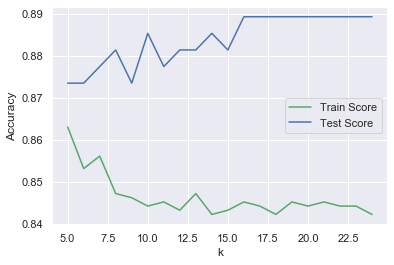

In [460]:
x_axis = range(5,25)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [461]:
train_score_array = []
test_score_array = []

for k in range(5,25):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train_reduced, Y_train)
    train_score_array.append(knn.score(X_train_reduced, Y_train))
    test_score_array.append(knn.score(X_test_reduced, Y_test))

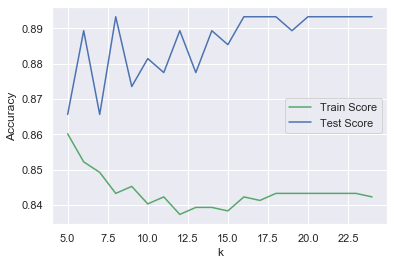

In [462]:
x_axis = range(5,25)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [463]:
knn = KNeighborsClassifier(16)
knn.fit(X_train_reduced, Y_train)

knn1 = KNeighborsClassifier(16)
knn1.fit(X_train, Y_train)


#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
Y_pred = knn.predict(X_test_reduced)
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[224,   1],
       [ 26,   2]], dtype=int64)

In [464]:
print(knn1.score(X_train, Y_train))
print(knn1.score(X_test, Y_test))
print(knn.score(X_train_reduced, Y_train))
print(knn.score(X_test_reduced, Y_test))

0.8452380952380952
0.8893280632411067
0.8422619047619048
0.8932806324110671


The gap between the Test and Train Score for the reduced dataset is minimum when k = 16 for both reduced and unreduced dataset but the test score is better for the reduced dataset.

## KNN Classification with GridSearch

In [465]:
from sklearn.model_selection import cross_val_score
import numpy as np

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, Y, cv=5)

#print each cv score (accuracy) and average them
print(cv_scores)
print(np.mean(cv_scores))


[0.83794466 0.82608696 0.82936508 0.79761905 0.80079681]
0.8183625120572982


In [466]:

from sklearn.model_selection import GridSearchCV

#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X, Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [467]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 10}

In [468]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.8517049960348929

In [469]:
from sklearn.model_selection import cross_val_score
import numpy as np

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_reduced, Y, cv=5)

#print each cv score (accuracy) and average them
print(cv_scores)
print(np.mean(cv_scores))


[0.83003953 0.81818182 0.82142857 0.81746032 0.79681275]
0.8167845963532783


In [470]:

from sklearn.model_selection import GridSearchCV

#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X_reduced, Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [471]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 10}

In [472]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.852498017446471

The Test score is slightly more for the reduced dataset than the unreduced one but the number of neighbours(best parameters) remains the same for both.

## Logistic Regression

In [473]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, Y_train)
    log_l2.fit(X_train, Y_train)
    train_score_l1.append(log_l1.score(X_train, Y_train))
    train_score_l2.append(log_l2.score(X_train, Y_train))
    test_score_l1.append(log_l1.score(X_test, Y_test))
    test_score_l2.append(log_l2.score(X_test, Y_test))

c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-pa

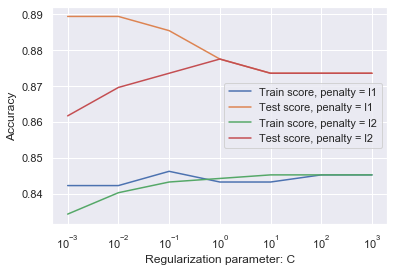

In [474]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [475]:
log_l1 = LogisticRegression(penalty = 'l1', C = 10)
log_l2 = LogisticRegression(penalty = 'l2', C = 10)
log_l1.fit(X_train, Y_train)
log_l2.fit(X_train, Y_train)

c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [476]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
Y_pred = log_l1.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[219,   6],
       [ 26,   2]], dtype=int64)

For Reduced Dataset

In [477]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train_reduced, Y_train)
    log_l2.fit(X_train_reduced, Y_train)
    train_score_l1.append(log_l1.score(X_train_reduced, Y_train))
    train_score_l2.append(log_l2.score(X_train_reduced, Y_train))
    test_score_l1.append(log_l1.score(X_test_reduced, Y_test))
    test_score_l2.append(log_l2.score(X_test_reduced, Y_test))

c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-pa

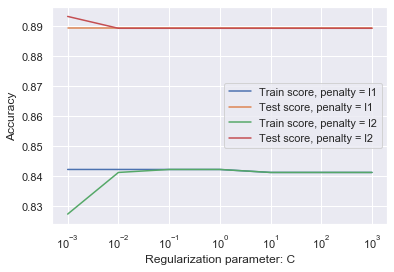

In [478]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

The best value for the Regularization Parameter is 1 for both l1 and l2.

In [479]:
log_l1 = LogisticRegression(penalty = 'l1', C = 1)
log_l2 = LogisticRegression(penalty = 'l2', C = 1)
log_l1.fit(X_train_reduced, Y_train)
log_l2.fit(X_train_reduced, Y_train)

c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [480]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
Y_pred = log_l1.predict(X_test_reduced)
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[225,   0],
       [ 28,   0]], dtype=int64)

The Accuracy rate for this model is 88.93% which is better than 87.3% for the unreduced dataset.

## Decision Tree

In [481]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.791


In [482]:
Y_pred=dtree.predict(X_test)

In [483]:
from sklearn.metrics import recall_score, accuracy_score, f1_score

reg_model_all = reg_model_all.append({'Model' : 'Decision Tree',
                                                'Classification' : 'Dtree without PCA, max_depth-none',
                                        'Train Score' : dtree.score(X_train, Y_train),
                                       'Test Score' : dtree.score(X_test, Y_test),
                                       'Recall' : recall_score(Y_test,Y_pred, average=None),
                                    'Accuracy' : accuracy_score(Y_test,Y_pred), 
                                     'F1' : f1_score(Y_test,Y_pred, average=None)},
                                               ignore_index=True)

In [484]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train_reduced, Y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train_reduced, Y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test_reduced, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.747


In [485]:
Y_pred=dtree.predict(X_test_reduced)

In [486]:
from sklearn.metrics import recall_score, accuracy_score, f1_score

reg_model_all = reg_model_all.append({'Model' : 'Decision Tree',
                                                'Classification' : 'Dtree with PCA, max_depth-none',
                                        'Train Score' : dtree.score(X_train_reduced, Y_train),
                                       'Test Score' : dtree.score(X_test_reduced, Y_test),
                                       'Recall' : recall_score(Y_test,Y_pred, average=None),
                                    'Accuracy' : accuracy_score(Y_test,Y_pred), 
                                     'F1' : f1_score(Y_test,Y_pred, average=None)},
                                               ignore_index=True)

The Accuracy on test set has decreased for the unreduced dataset.

In [487]:
dtree = DecisionTreeClassifier(max_depth=3, random_state=0)
dtree.fit(X_train, Y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, Y_test)))

Accuracy on training set: 0.858
Accuracy on test set: 0.889


In [488]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
Y_pred = dtree.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[224,   1],
       [ 27,   1]], dtype=int64)

In [489]:
Y_pred=dtree.predict(X_test)

In [490]:
from sklearn.metrics import recall_score, accuracy_score, f1_score

reg_model_all = reg_model_all.append({'Model' : 'Decision Tree',
                                                'Classification' : 'Dtree without PCA, max_depth-3',
                                        'Train Score' : dtree.score(X_train, Y_train),
                                       'Test Score' : dtree.score(X_test, Y_test),
                                       'Recall' : recall_score(Y_test,Y_pred, average=None),
                                    'Accuracy' : accuracy_score(Y_test,Y_pred), 
                                     'F1' : f1_score(Y_test,Y_pred, average=None)},
                                               ignore_index=True)

In [491]:
dtree = DecisionTreeClassifier(max_depth=3, random_state=0)
dtree.fit(X_train_reduced, Y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train_reduced, Y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test_reduced, Y_test)))

Accuracy on training set: 0.847
Accuracy on test set: 0.870


The Accuracy on both train and test set has decreased for the unreduced dataset.

In [492]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
Y_pred = dtree.predict(X_test_reduced)
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[220,   5],
       [ 28,   0]], dtype=int64)

In [493]:
Y_pred=dtree.predict(X_test_reduced)

In [494]:
from sklearn.metrics import recall_score, accuracy_score, f1_score

reg_model_all = reg_model_all.append({'Model' : 'Decision Tree',
                                                'Classification' : 'Dtree with PCA, max_depth-3',
                                        'Train Score' : dtree.score(X_train_reduced, Y_train),
                                       'Test Score' : dtree.score(X_test_reduced, Y_test),
                                       'Recall' : recall_score(Y_test,Y_pred, average=None),
                                    'Accuracy' : accuracy_score(Y_test,Y_pred), 
                                     'F1' : f1_score(Y_test,Y_pred, average=None)},
                                               ignore_index=True)

The Accuracy Rate has decreased to 86.9% for reduced dataset in comparison to 88.9% for unreduced dataset.

In [495]:
reg_model_all

,Model,Classification,Train Score,Test Score,Recall,Accuracy,F1
0,Linear SVC,Linear SVC without PCA,0.844246,0.881423,"[0.9911111111111112, 0.0]",0.881423,"[0.9369747899159664, 0.0]"
1,Linear SVC,Linear SVC with PCA,0.842262,0.889328,"[1.0, 0.0]",0.889328,"[0.9414225941422594, 0.0]"
2,SVM Linear Kernel,SVM(Linear) without PCA,0.842262,0.889328,"[1.0, 0.0]",0.889328,"[0.9414225941422594, 0.0]"
3,SVM Linear Kernel,SVM(Linear) with PCA,0.842262,0.889328,"[1.0, 0.0]",0.889328,"[0.9414225941422594, 0.0]"
4,SVM RBF Kernel,SVM(RBF) without PCA,0.842262,0.889328,"[1.0, 0.0]",0.889328,"[0.9414225941422594, 0.0]"
5,SVM RBF Kernel,SVM(RBF) with PCA,0.842262,0.889328,"[1.0, 0.0]",0.889328,"[0.9414225941422594, 0.0]"
6,Decision Tree,"Dtree without PCA, max_depth-none",1.000000,0.790514,"[0.8577777777777778, 0.25]",0.790514,"[0.8792710706150343, 0.208955223880597]"
7,Decision Tree,"Dtree with PCA, max_depth-none",1.000000,0.747036,"[0.8133333333333334, 0.21428571428571427]",0.747036,"[0.8511627906976744, 0.15789473684210525]"
8,Decision Tree,"Dtree without PCA, max_depth-3",0.858135,0.889328,"[0.9955555555555555, 0.03571428571428571]",0.889328,"[0.9411764705882353, 0.06666666666666667]"
9,Decision Tree,"Dtree with PCA, max_depth-3",0.847222,0.869565,"[0.9777777777777777, 0.0]",0.869565,"[0.9302325581395349, 0.0]"


## Neural Networks

Perceptron

In [496]:
# step 1: build the model
model = Sequential()
model.add(Dense(30, input_dim = 46, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

In [497]:
# step 2: compile the model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [498]:
# step 3: train the model
model.fit(X_train, Y_train, batch_size= 128, epochs=20)

Epoch 1/20
1008/1008 [==============================] - 1s 669us/sample - loss: 2.9914 - acc: 0.0298
Epoch 2/20
1008/1008 [==============================] - 0s 28us/sample - loss: 2.6785 - acc: 0.0665
Epoch 3/20
1008/1008 [==============================] - 0s 33us/sample - loss: 2.3927 - acc: 0.1240
Epoch 4/20
1008/1008 [==============================] - 0s 32us/sample - loss: 2.1290 - acc: 0.2133
Epoch 5/20
1008/1008 [==============================] - 0s 32us/sample - loss: 1.8884 - acc: 0.3125
Epoch 6/20
1008/1008 [==============================] - 0s 34us/sample - loss: 1.6703 - acc: 0.4286
Epoch 7/20
1008/1008 [==============================] - 0s 24us/sample - loss: 1.4774 - acc: 0.5556
Epoch 8/20
1008/1008 [==============================] - 0s 23us/sample - loss: 1.3074 - acc: 0.6607
Epoch 9/20
1008/1008 [==============================] - 0s 32us/sample - loss: 1.1592 - acc: 0.7232
Epoch 10/20
1008/1008 [==============================] - 0s 28us/sample - loss: 1.0362 - acc: 0.770

In [499]:
# Step 4: Model evaluation


loss_and_metrics = model.evaluate(X_test, Y_test)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

253/253 [==============================] - 0s 484us/sample - loss: 0.4952 - acc: 0.8656
Test Loss 0.4951546943706015
Test Accuracy 0.8656126


In [500]:
predicted_classes = model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == Y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != Y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")


219  classified correctly
34  classified incorrectly


## Insights and Final Conclusion:

Difference between Reduced(using PCA) and Unreduced Dataset

In [501]:
reg_model_all

,Model,Classification,Train Score,Test Score,Recall,Accuracy,F1
0,Linear SVC,Linear SVC without PCA,0.844246,0.881423,"[0.9911111111111112, 0.0]",0.881423,"[0.9369747899159664, 0.0]"
1,Linear SVC,Linear SVC with PCA,0.842262,0.889328,"[1.0, 0.0]",0.889328,"[0.9414225941422594, 0.0]"
2,SVM Linear Kernel,SVM(Linear) without PCA,0.842262,0.889328,"[1.0, 0.0]",0.889328,"[0.9414225941422594, 0.0]"
3,SVM Linear Kernel,SVM(Linear) with PCA,0.842262,0.889328,"[1.0, 0.0]",0.889328,"[0.9414225941422594, 0.0]"
4,SVM RBF Kernel,SVM(RBF) without PCA,0.842262,0.889328,"[1.0, 0.0]",0.889328,"[0.9414225941422594, 0.0]"
5,SVM RBF Kernel,SVM(RBF) with PCA,0.842262,0.889328,"[1.0, 0.0]",0.889328,"[0.9414225941422594, 0.0]"
6,Decision Tree,"Dtree without PCA, max_depth-none",1.000000,0.790514,"[0.8577777777777778, 0.25]",0.790514,"[0.8792710706150343, 0.208955223880597]"
7,Decision Tree,"Dtree with PCA, max_depth-none",1.000000,0.747036,"[0.8133333333333334, 0.21428571428571427]",0.747036,"[0.8511627906976744, 0.15789473684210525]"
8,Decision Tree,"Dtree without PCA, max_depth-3",0.858135,0.889328,"[0.9955555555555555, 0.03571428571428571]",0.889328,"[0.9411764705882353, 0.06666666666666667]"
9,Decision Tree,"Dtree with PCA, max_depth-3",0.847222,0.869565,"[0.9777777777777777, 0.0]",0.869565,"[0.9302325581395349, 0.0]"


The Accuracy score for the reduced dataset is similar or somewhat better than the score of the unreduced dataset(exception - Logistic Regression, where the Accuracy rate for the unreduced data is 88.93% which is better than 87.3% for the unreduced dataset and also Decision Tree Models).

We have used 2 PC for our different models. There is not much difference in the scores for the reduced and unreduced data, maybe because we have taken fewer number of Principal Components.

We also noticed that there is a huge variance that is being explained by the Eigen Vectors.


| Voting Classifers Scores | Hard Voting | Soft Voting |
| --- | --- | --- |
| Train | .85 | .86 |
| Test | .89 | .89 |

Soft Voting has better score than Hard Voting.

| Bagging Scores | DTree | Logistic Regression |
| --- | --- | --- |
| Train | .84 | .84 |
| Test | .89 | .89 |

There is no difference in the Train and Test Scores for both the models.

| Pasting Scores | RBF | Linear |
| --- | --- | --- |
| Train | .84 | .84 |
| Test | .89 | .89 |

There is no difference in the Train and Test Scores for both the models.

| Pasting Scores | DTree without Depth | DTree with max_depth - 5 |
| --- | --- | --- |
| Train | .84 | .93 |
| Test | .89 | .87 |

This is a case of overfitting for the DTree with max_depth=5

Gradient Boosting Classifier

Train Score - 0.8472 , Test Score - 0.8814






ANN

The Artificial Neural Network has also given us a good enough Accuracy Score for our model(87.31%), which is in sync with the accuracy scores of our other models so the perceptron model is said to be working for our dataset.



## Next Steps

As we have noticed that there is huge Variance in Dataset due to which there is not enough difference in the scores even after reduction of dataset by PCA.

PCA Explained Variance array([1.04756126e+10, 4.72279709e+08])

We plan to further filter and scale the dataset so that the values are not very far from each other and don't skew the results for PCA.

Also, we will explore the reasons behind why the reduced dataset accuracy score is better for SVC but not for Logistic Regression and Decision Tree, this might be a case of Reconstruction Error or loss of Information.